### Integrated-gradient for image classification (PyTorch)

This is an example of the integrated-gradient method on image classification with a PyTorch model. If using this explainer, please cite the original work: https://github.com/ankurtaly/Integrated-Gradients.

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import json
import torch
from torchvision import models, transforms
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.explainers.vision import IntegratedGradientImage

We recommend using `Image` to represent a batch of images. `Image` can be constructed from a numpy array or a Pillow image. The following code loads one test image and the class names on ImageNet.

In [3]:
# Load the test image
img = Image(PilImage.open('../data/images/dog_cat.png').convert('RGB'))
# Load the class names
with open('../data/images/imagenet_class_index.json', 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

The model considered here is a ResNet model pretrained on ImageNet. The preprocessing function takes an `Image` instance as its input and outputs the processed features that the ML model consumes. In this example, the `Image` object is converted into a torch tensor via the defined `transform`.

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.inception_v3(pretrained=True).to(device)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
preprocess = lambda ims: torch.stack([transform(im.to_pil()) for im in ims])

To initialize `IntegratedGradientImage`, we need to set the following parameters:

  - `model`: The ML model to explain, e.g., `tf.keras.Model` or `torch.nn.Module`.
  - `preprocess`: The preprocessing function converting the raw data (a `Image` instance) into the inputs of `model`.
  - `mode`: The task type, e.g., "classification" or "regression".

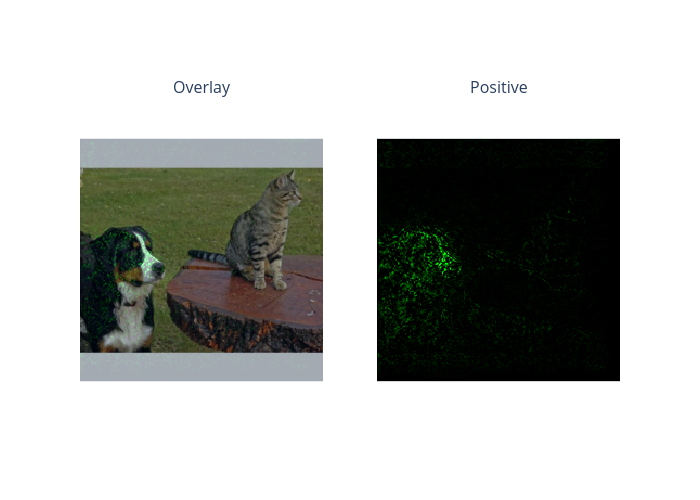

In [5]:
explainer = IntegratedGradientImage(
    model=model,
    preprocess_function=preprocess
)
# Explain the top label
explanations = explainer.explain(img)
explanations.ipython_plot(index=0, class_names=idx2label)